**UNDERSTANDING THE DATA**

In [1]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 578.1 MB 40 kB/s s eta 0:00:01/s eta 0:00:29[K     |▎                               | 5.6 MB 20.1 MB/s eta 0:00:29MB/s eta 0:00:05
     |████████████████████████████████| 14.1 MB 63.0 MB/s eta 0:00:01s eta 0:00:01
     |████████████████████████████████| 438 kB 59.4 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 19.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 58.6 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 63.6 MB/s eta 0:00:01
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.12.0
    Uninstalling absl-py-0.12.0:
      Successfully uninstalled absl-py-0.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling

1)Importing the required libraries

In [3]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

2)Loading the data

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


3)Analyzing the data 

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
print(y_train[0])

5


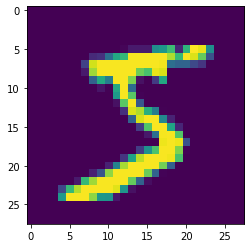

In [9]:
plt.imshow(x_train[0])

3)Reshaping the data

In [10]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

4)Applying onehot encoding

In [11]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [12]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**MODEL BUILDING**

1)Add CNN layers

In [13]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

2022-11-16 18:45:09.480591: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-16 18:45:09.480638: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)


In [14]:
model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

2)Compiling the model

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics='accuracy')

3)Train the model

In [16]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 125s 66ms/step - loss: 0.2116 - accuracy: 0.9510 - val_loss: 0.0747 - val_accuracy: 0.9770
Epoch 2/5
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0658 - accuracy: 0.9797 - val_loss: 0.0733 - val_accuracy: 0.9782
Epoch 3/5
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0446 - accuracy: 0.9865 - val_loss: 0.0848 - val_accuracy: 0.9772
Epoch 4/5
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0365 - accuracy: 0.9889 - val_loss: 0.0993 - val_accuracy: 0.9777
Epoch 5/5
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.1064 - val_accuracy: 0.9804


4)Observing the metrics

In [17]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Test loss and Accuracy: ")
print(metrics)

Test loss and Accuracy: 
[0.10640865564346313, 0.980400025844574]


5)Test the model

In [18]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 100ms/step
[[2.1039933e-19 2.9014110e-22 3.6476423e-18 8.3678481e-12 1.4491975e-07
  4.8521668e-12 3.7167211e-25 4.3413442e-10 1.7334667e-11 9.9999988e-01]]


In [19]:
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[9]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


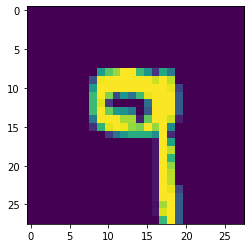

In [20]:
plt.imshow(x_test[6000])

In [22]:
import numpy as np
print(np.argmax(prediction, axis=1))

[9]


In [23]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

6)Save the model

In [24]:
model.save('models/mnistCNN.h5')

In [25]:
cd models

/home/wsuser/work/models


In [26]:
!tar -zcvf hdr_deployment.tgz mnistCNN.h5

mnistCNN.h5


In [27]:
ls -1

hdr_deployment.tgz
mnistCNN.h5


In [28]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 20.7 MB/s eta 0:00:01


In [29]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"2O5gSlQG_QO9icBxAFviEAeCKHm6fBNsBuk35xXw0IOI"
}
client = APIClient(credentials)

In [33]:
client

In [34]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/632f58eed43f435cbf57ad5579f9ac31:f9596716-6fd7-43d6-a91e-134bcfe10e79::',
      'guid': 'f9596716-6fd7-43d6-a91e-134bcfe10e79',
      'name': 'Watson Machine Learning-aa',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'digitclassification',
    'scope': {'bss_account_id': '632f58eed43f435cbf57ad5579f9ac31'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '09df52e5-2855-4407-8b34-f04c6f1e9f70',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '09185936a44b4ccab446b15f4dc6b582',
        'api_key': 'e23ivga27hPloceUiwpdDdXBlv-F0IxR-yBBzMsQsSgT',
        'secret_access_key': 'c3763d23660575ec46f6b607afb0bf5070ec62d23afc1067',
        'service_id': 'ServiceId-29f81f48-e26c-462d-a351-73700b7a6af9'},
       'editor': {'access_key_id': '199d8c48d79b4d05b69121784ff7bcf8',
        '

In [37]:
def guid_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [40]:
client.set.default_space("55e8adff-709c-404a-af0f-32bd33585bf0")

'SUCCESS'

In [41]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

7)Test with the saved model

In [42]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [43]:
model_details = client.repository.store_model(model='hdr_deployment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [44]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-16T19:31:55.698Z',
  'id': 'ae4fbe87-f659-492e-9e22-d1f188d12d58',
  'modified_at': '2022-11-16T19:31:58.997Z',
  'name': 'Digit Recognition System',
  'owner': 'IBMid-6630041ZU7',
  'resource_key': 'd2ac0d39-e5ea-4b66-8bd1-53fe06fc09e5',
  'space_id': '55e8adff-709c-404a-af0f-32bd33585bf0'},
 'system': {'warnings': []}}

In [45]:
model_id = client.repository.get_model_id(model_details)
model_id

'ae4fbe87-f659-492e-9e22-d1f188d12d58'

In [46]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/home/wsuser/work/models/DigitRecog_IBM_model.tar.gz'

In [47]:
ls

DigitRecog_IBM_model.tar.gz  hdr_deployment.tgz  mnistCNN.h5
